# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/jonahcic/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 39 (delta 6), reused 4 (delta 1), pack-reused 23 (from 1)
Receiving objects: 100% (39/39), 16.26 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

' The higher aid values tend to come exclusively from 4-year, private not-for-profit institutions. This also seems to correlate with the higher graduation rates from the same institutions. '

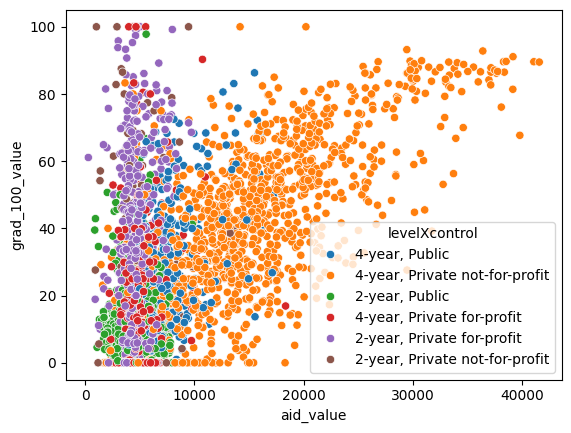

In [2]:
""" *** certain code chunks commented out as assignment was completed for working/viewing ease *** """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1

df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv',low_memory=False)

# 2

# print( df.shape, '\n')
# print( df.head(), '\n')

""" In the data, there are 3,798 observations, and 63 variables. """
""" The variables include but are not limited to the city, state, level, and nickname. """

# 3

# print(pd.crosstab(df["control"],df["level"]),"\n")

""" Majority of the institutions in the data set are Private not-for-profit & 4-year. The least amont of institutions fall under the Private not-for-profit & 2-year. """

# 4

# sns.histplot(df["grad_100_value"])
# sns.kdeplot(df["grad_100_value"])
# sns.boxplot(df["grad_100_value"])
# df["grad_100_value"].describe()

# 5

# sns.kdeplot(data=df,x="grad_100_value",hue="control")
# sns.kdeplot(data=df,x="grad_100_value",hue="level")
# df.loc[:,["control","grad_100_value"]].groupby("control").describe()
# df.loc[:,["level","grad_100_value"]].groupby("level").describe()

""" The institutions that appear to have the best graduation rates are 4-year institutions, and private not-for-profit institutions """

# 6

df["levelXcontrol"]=df["level"]+', '+df["control"]
# sns.kdeplot(data=df,x="grad_100_value",hue="levelXcontrol")

""" The institutions that appear to have the best graduation rates are private not-for-profit institutions, without much difference between 2-year and 4-year. """

# 7

# sns.kdeplot(data=df,x="aid_value",hue="level")
# sns.kdeplot(data=df,x="aid_value",hue="control")
# df.loc[:,["level","aid_value"]].groupby("level").describe()
# df.loc[:,["control","aid_value"]].groupby("control").describe()

""" The shape of the graph can be explained by the fact that private not-for-profit institutions generally provide more aid than private for-profit and public institutions. """

# 8

# sns.scatterplot(data=df,x="aid_value",y="grad_100_value")
# sns.scatterplot(data=df,x="aid_value",y="grad_100_value",hue="level")
sns.scatterplot(data=df,x="aid_value",y="grad_100_value",hue="levelXcontrol")

""" The higher aid values tend to come exclusively from 4-year, private not-for-profit institutions. This also seems to correlate with the higher graduation rates from the same institutions. """

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. N/A (used https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data)


2. The data dictionary does document how missings are handled. For categorical variables, it describes the possible values and missing value codes. For example, for the variable INS_PRIVLTC, The possible values are Yes, No, and Missing/Inapplicable, and the codes for each respective value '1' for yes, '2' for no, and '.' for missing/inapplicable. For numeric variables, it doesn't describe how missing values are handled. Rather than having missing values or different individual data values, the dataset groups different numeric data into range pools.


3. A few variables I found interesting are: ADM_H_MEDSTA (Medicare Status Code), ADM_H_PHYEVT (Total Office Visits (yr)), INS_D_MADV (Enrolled in Medicare Advantage), and HLT_D_MUSTIM (hours spent increasing muscle strength per wk). I find these interesting because I wonder if there is a link between medicare status and the number of visits, or the number of hours increasing muscle strength and the number of visits.

In [30]:
### 3 continued

""" *** certain code chunks commented out as assignment was completed for working/viewing ease *** """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/visualization/assignment/data/sfpuf2021_1_fall.csv",low_memory=False)

# print( df.shape, "\n")
# print( df.head(), "\n")

# variables of interest
status = df["ADM_H_MEDSTA"]
total_visits = df["ADM_H_PHYEVT"]
enrolled_adv = df["INS_D_MADV"]
hrs_muscle = df["HLT_D_MUSTIM"]

# replacing codes with values for categorical variables (status and enrolled_adv)
status = status.replace(1,"Aged")
status = status.replace(2,"Disabled")
status = status.replace(3,"Unknown")
enrolled_adv = enrolled_adv.replace(1,"Enrolled")
enrolled_adv = enrolled_adv.replace(2,"Never Enrolled")

# combining variables of interest into dataframe of interest
df_interest = pd.DataFrame({"Status": status, "Total Visits": total_visits, "Enrolled Advanced": enrolled_adv,
                           "Hours per Week Increasing Muscle Strength": hrs_muscle})


# print( df_interest.shape, "\n")
# print( df_interest.head(), "\n")

### 4

# s_status = df_interest["Status"]
# df_status = s_status.to_frame()
# sns.countplot(data=df_status, x="Status")

# sns.boxplot(df_interest["Total Visits"])

# s_enroll = df_interest["Enrolled Advanced"]
# df_enroll = s_enroll.to_frame()
# sns.countplot(data=df_enroll, x="Enrolled Advanced")

# sns.boxplot(df_interest["Hours per Week Increasing Muscle Strength"])

""" Yes, there are a few outliers in individuals who spent an increased amount of time per week increasing muscle strength. """

### 5

# sns.histplot(df_interest["Total Visits"])
# sns.histplot(df_interest["Hours per Week Increasing Muscle Strength"])

""" No, the results don't require any transformation to scale them. """

### 6

# sns.scatterplot(data=df_interest,x="Hours per Week Increasing Muscle Strength",y="Total Visits",hue="Status")

""" It's difficult to discern trends from this plot, but there may be a correlation between people with disabled status needing to visit more often when they spend more time increasing muscle strength per week. """

### 7

df_interest.loc[:,["Status","Total Visits"]].groupby("Status").describe()

""" It seems that people in the "Aged" category visited more often than those in the "Disabled" category. """

Total Visits                                             
                count      mean       std  min  25%  50%  75%  max
Status                                                            
Aged          10627.0  0.994166  1.386310  0.0  0.0  0.0  2.0  5.0
Disabled       2139.0  0.817204  1.291030  0.0  0.0  0.0  1.0  5.0
Unknown          17.0  1.294118  0.848875  0.0  1.0  1.0  2.0  3.0